In [1]:
#Imports first
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Breast Cancer Data Analysis
Main points:
* To explore data and be able to form logical conclusions
* Clean data based on type of cancer
* Visualize data using matplot or pandas
* Draw an analytical assessment of the data

# Made By:
* Radwan Albahrani
* Fahad Al-Saleh
* Ibrahim Alharbi
* Abdulaziz Alsolaia

## Step 1: Reading and Cleaning Data
* Read the man csv file
* Display some data and inspect it
* Explore Null values
* Deal with null values using Logical methods
* Split data based on need
* Sort values

### Reading data set and setting null values

In [2]:
#Reading our dataset
breast_cancer = pd.read_csv("Breast_Cancer_Diagnostic.csv")
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,?,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#Exploring Null values
breast_cancer.isnull().sum()[breast_cancer.isnull().sum() != 0].sort_values()

texture_mean               1
concavity_mean             1
symmetry_se                1
radius_worst               1
smoothness_se              2
compactness_se             2
concave points_worst       2
symmetry_worst             2
fractal_dimension_worst    2
symmetry_mean              3
compactness_worst          3
concavity_worst            3
fractal_dimension_mean     4
concavity_se               5
dtype: int64

In [4]:
#Converting Texture_mean to a numeric while ignoring any error, removing all strings.
breast_cancer["texture_mean"] = pd.to_numeric(breast_cancer["texture_mean"], errors="coerce")

In [5]:
#Making sure everything is now float
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               567 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             568 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              566 non-null float64
fractal_dimension_mean     565 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              567 non-null float64
compactness_se             567 non-null float64
concavity_se               564 non

### Splitting dataframes based on cancer type

In [6]:
#Splitting the data based on either being benign or malignant
diagnosis_split = [rows for x, rows in breast_cancer.groupby('diagnosis')]
diagnosis_split[0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,NaN,NaN,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [7]:
#Replacing All Null values with means depending on benign or malignant
for x in diagnosis_split[0].columns:
    if diagnosis_split[0][x].isnull().sum() != 0:
        diagnosis_split[0][x] =diagnosis_split[0][x].fillna(diagnosis_split[0][x].mean())

for x in diagnosis_split[1].columns:
    if diagnosis_split[1][x].isnull().sum() != 0:
        diagnosis_split[1][x] = diagnosis_split[1][x].fillna(diagnosis_split[0][x].mean())

### Sorting values on the split dataframes as well as the main dataframe

In [8]:
#sorting values by ascending order then resetting index per benign or malignant.
diagnosis_split[0].sort_values(by="radius_mean", ascending=True, inplace=True)
diagnosis_split[0].reset_index(drop=True, inplace=True)
diagnosis_split[1].sort_values(by="radius_mean", ascending=True, inplace=True)
diagnosis_split[1].reset_index(drop=True, inplace=True)

In [9]:
diagnosis_split[0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
1,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
2,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
3,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,901303,B,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,...,16.970,19.14,113.10,861.5,0.12350,0.25500,0.2114,0.12510,0.3153,0.08960
353,915452,B,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.045630,...,17.320,17.76,109.80,928.2,0.13540,0.13610,0.1947,0.13570,0.2300,0.07230
354,9010872,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.048350,...,18.130,25.45,117.20,1009.0,0.13380,0.16790,0.1663,0.09123,0.2394,0.06469
355,8711216,B,16.840,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,...,18.220,28.07,120.30,1032.0,0.08774,0.17100,0.1882,0.08436,0.2527,0.05972


In [10]:
diagnosis_split[1]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.1424,0.2964,0.09606
1,9013838,M,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,...,13.24,32.82,91.76,508.1,0.2184,0.93790,0.8402,0.2524,0.4154,0.14030
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
3,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.0612,0.0716,0.1978,0.06915
4,869691,M,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,30.00,33.62,211.70,2562.0,0.1573,0.60760,0.6476,0.2867,0.2355,0.10510
208,899987,M,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.6451,0.2756,0.3690,0.08815
209,873592,M,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,...,33.12,32.85,220.80,3216.0,0.1472,0.40340,0.5340,0.2688,0.2856,0.08082
210,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.42560,0.6833,0.2625,0.2641,0.07427


In [11]:
#merging benign and malignant to orignial dataframe
breast_cancer = diagnosis_split[0].merge(diagnosis_split[1], how="outer", sort=True)
#sorting values by ascending order
breast_cancer.sort_values(by="radius_mean", ascending=True, inplace=True)
#Resetting index
breast_cancer.reset_index(drop=True, inplace=True)

In [12]:
#Rechecking null values
breast_cancer.isnull().sum()[breast_cancer.isnull().sum() != 0]

Series([], dtype: int64)

In [13]:
#Grouping based on if its malignant or benign
diagnosis = breast_cancer.groupby("diagnosis")

### describing data based on benign and malignant on different Variables to understand the data more

In [14]:
#Describing a couple values in order to understand data more and difference between benign and malignant
diagnosis["radius_mean", 
          "texture_mean", 
          "smoothness_mean", 
          "compactness_mean",
          "area_mean"].describe().transpose()

diagnosis                        B            M
radius_mean      count  357.000000   212.000000
                 mean    12.146524    17.462830
                 std      1.780512     3.203971
                 min      6.981000    10.950000
                 25%     11.080000    15.075000
                 50%     12.200000    17.325000
                 75%     13.370000    19.590000
                 max     17.850000    28.110000
texture_mean     count  357.000000   212.000000
                 mean    17.914762    21.627403
                 std      3.995125     3.716417
                 min      9.710000    11.890000
                 25%     15.150000    19.295000
                 50%     17.390000    21.460000
                 75%     19.760000    23.765000
                 max     33.810000    39.280000
smoothness_mean  count  357.000000   212.000000
                 mean     0.092478     0.102898
                 std      0.013446     0.012608
                 min      0.052630     0.073710
                 25%      0.083060     0.094010
                 50%      0.090760     0.102200
                 75%      0.100700     0.110925
                 max      0.163400     0.144700
compactness_mean count  357.000000   212.000000
                 mean     0.080085     0.145188
                 std      0.033750     0.053987
                 min      0.019380     0.046050
                 25%      0.055620     0.109600
                 50%      0.075290     0.132350
                 75%      0.097550     0.172400
                 max      0.223900     0.345400
area_mean        count  357.000000   212.000000
                 mean   462.790196   978.376415
                 std    134.287118   367.937978
                 min    143.500000   361.600000
                 25%    378.200000   705.300000
                 50%    458.400000   932.000000
                 75%    551.100000  1203.750000
                 max    992.100000  2501.000000

In [15]:
#Describing a couple values in order to understand data more and difference between benign and malignant
diagnosis["concavity_mean",
          "perimeter_mean",
          "symmetry_mean",
          "fractal_dimension_mean"
         ].describe().transpose()

diagnosis                              B           M
concavity_mean         count  357.000000  212.000000
                       mean     0.046058    0.160012
                       std      0.043442    0.075361
                       min      0.000000    0.023980
                       25%      0.020310    0.108875
                       50%      0.037090    0.149950
                       75%      0.059990    0.199325
                       max      0.410800    0.426800
perimeter_mean         count  357.000000  212.000000
                       mean    78.075406  115.365377
                       std     11.807438   21.854653
                       min     43.790000   71.900000
                       25%     70.870000   98.745000
                       50%     78.180000  114.200000
                       75%     86.100000  129.925000
                       max    114.600000  188.500000
symmetry_mean          count  357.000000  212.000000
                       mean     0.174186    0.192440
                       std      0.024807    0.027582
                       min      0.106000    0.130800
                       25%      0.158000    0.174050
                       50%      0.171400    0.189400
                       75%      0.189000    0.209525
                       max      0.274300    0.304000
fractal_dimension_mean count  357.000000  212.000000
                       mean     0.062867    0.062670
                       std      0.006747    0.007411
                       min      0.051850    0.049960
                       25%      0.058530    0.056632
                       50%      0.061540    0.061855
                       75%      0.065760    0.066970
                       max      0.095750    0.097440

## Step 3: Visualization
* Compare different graphs from different libraries
* Try out different types of graphs
* Use graphs to compare cancer attributes
* Use graphs to compare counts

### Trying Pandas Graphs

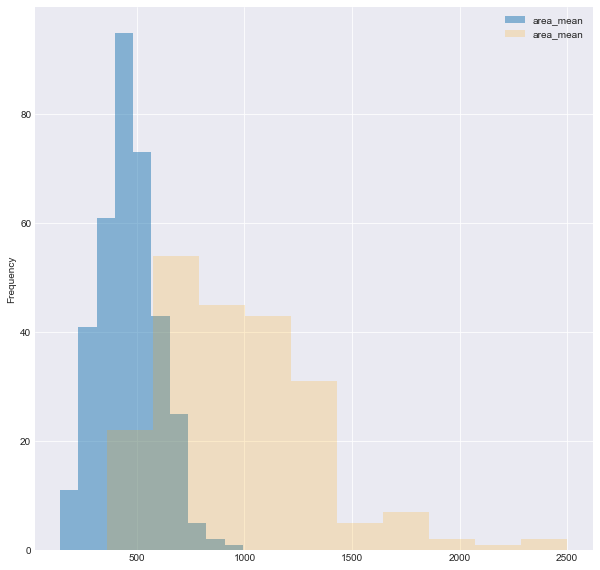

In [16]:
#this is a code template for graphing using pandas instad of matplot(not used in presentation)
diagnosis_split[0]["area_mean"].plot.hist(alpha = 0.5, figsize=(10,10), legend=True, )
diagnosis_split[1]["area_mean"].plot.hist(alpha = 0.2, legend=True, color="orange", figsize=(10,10))

### Trying matplot graphs

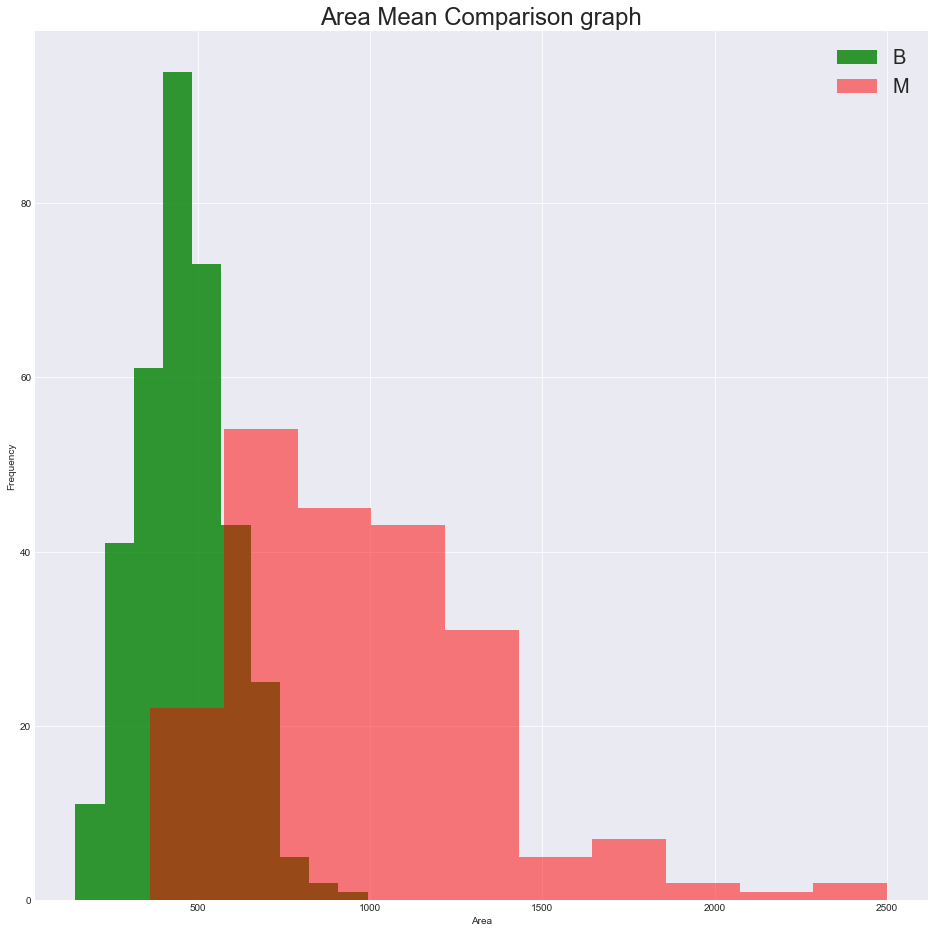

In [17]:
#This is a code template that i shall be using for the rest of the plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
plt.rcParams.update({'font.size': 20})
plt.hist(diagnosis_split[0]["area_mean"], alpha=0.8, label=['B'],color=['g'])
plt.hist(diagnosis_split[1]["area_mean"] , alpha=0.5, label=['M'],color=['r'])
plt.legend(loc='upper right')
plt.yscale("linear")
plt.ylabel("Frequency")
plt.xlabel("Area")
plt.title("Area Mean Comparison graph")
plt.show()

### Trying box plot

No handles with labels found to put in legend.


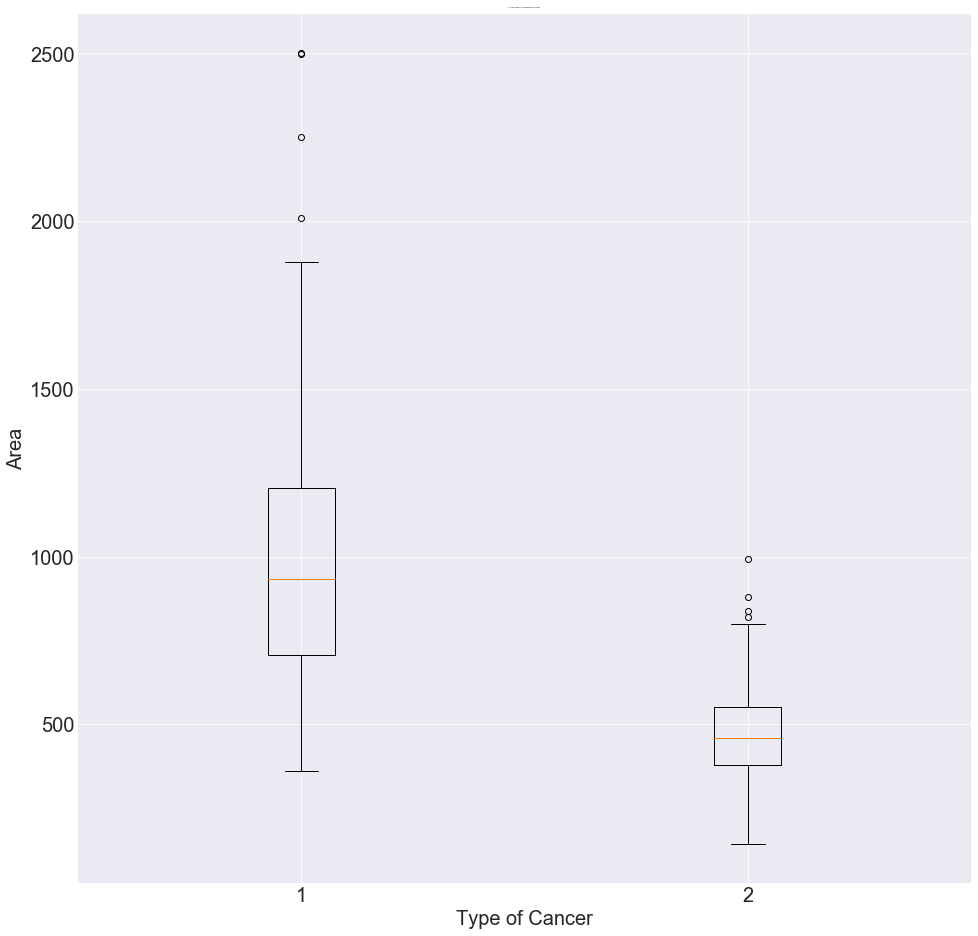

In [18]:
#Graphing the area comparison graph using a boxplot (not used in final presentation)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
plt.rcParams.update({'font.size': 2})
plt.boxplot([diagnosis_split[1]["area_mean"], diagnosis_split[0]["area_mean"]])
plt.legend(loc='upper right')
plt.rc('xtick', labelsize=2) 
plt.rc('ytick', labelsize=2)
plt.yscale("linear")
plt.ylabel("Area")
plt.xlabel("Type of Cancer")
plt.title("Area Mean Comparison graph")
plt.show()

### Deciding histograms from matplot are the best option, so creating a histogram for each comparable variable from the data

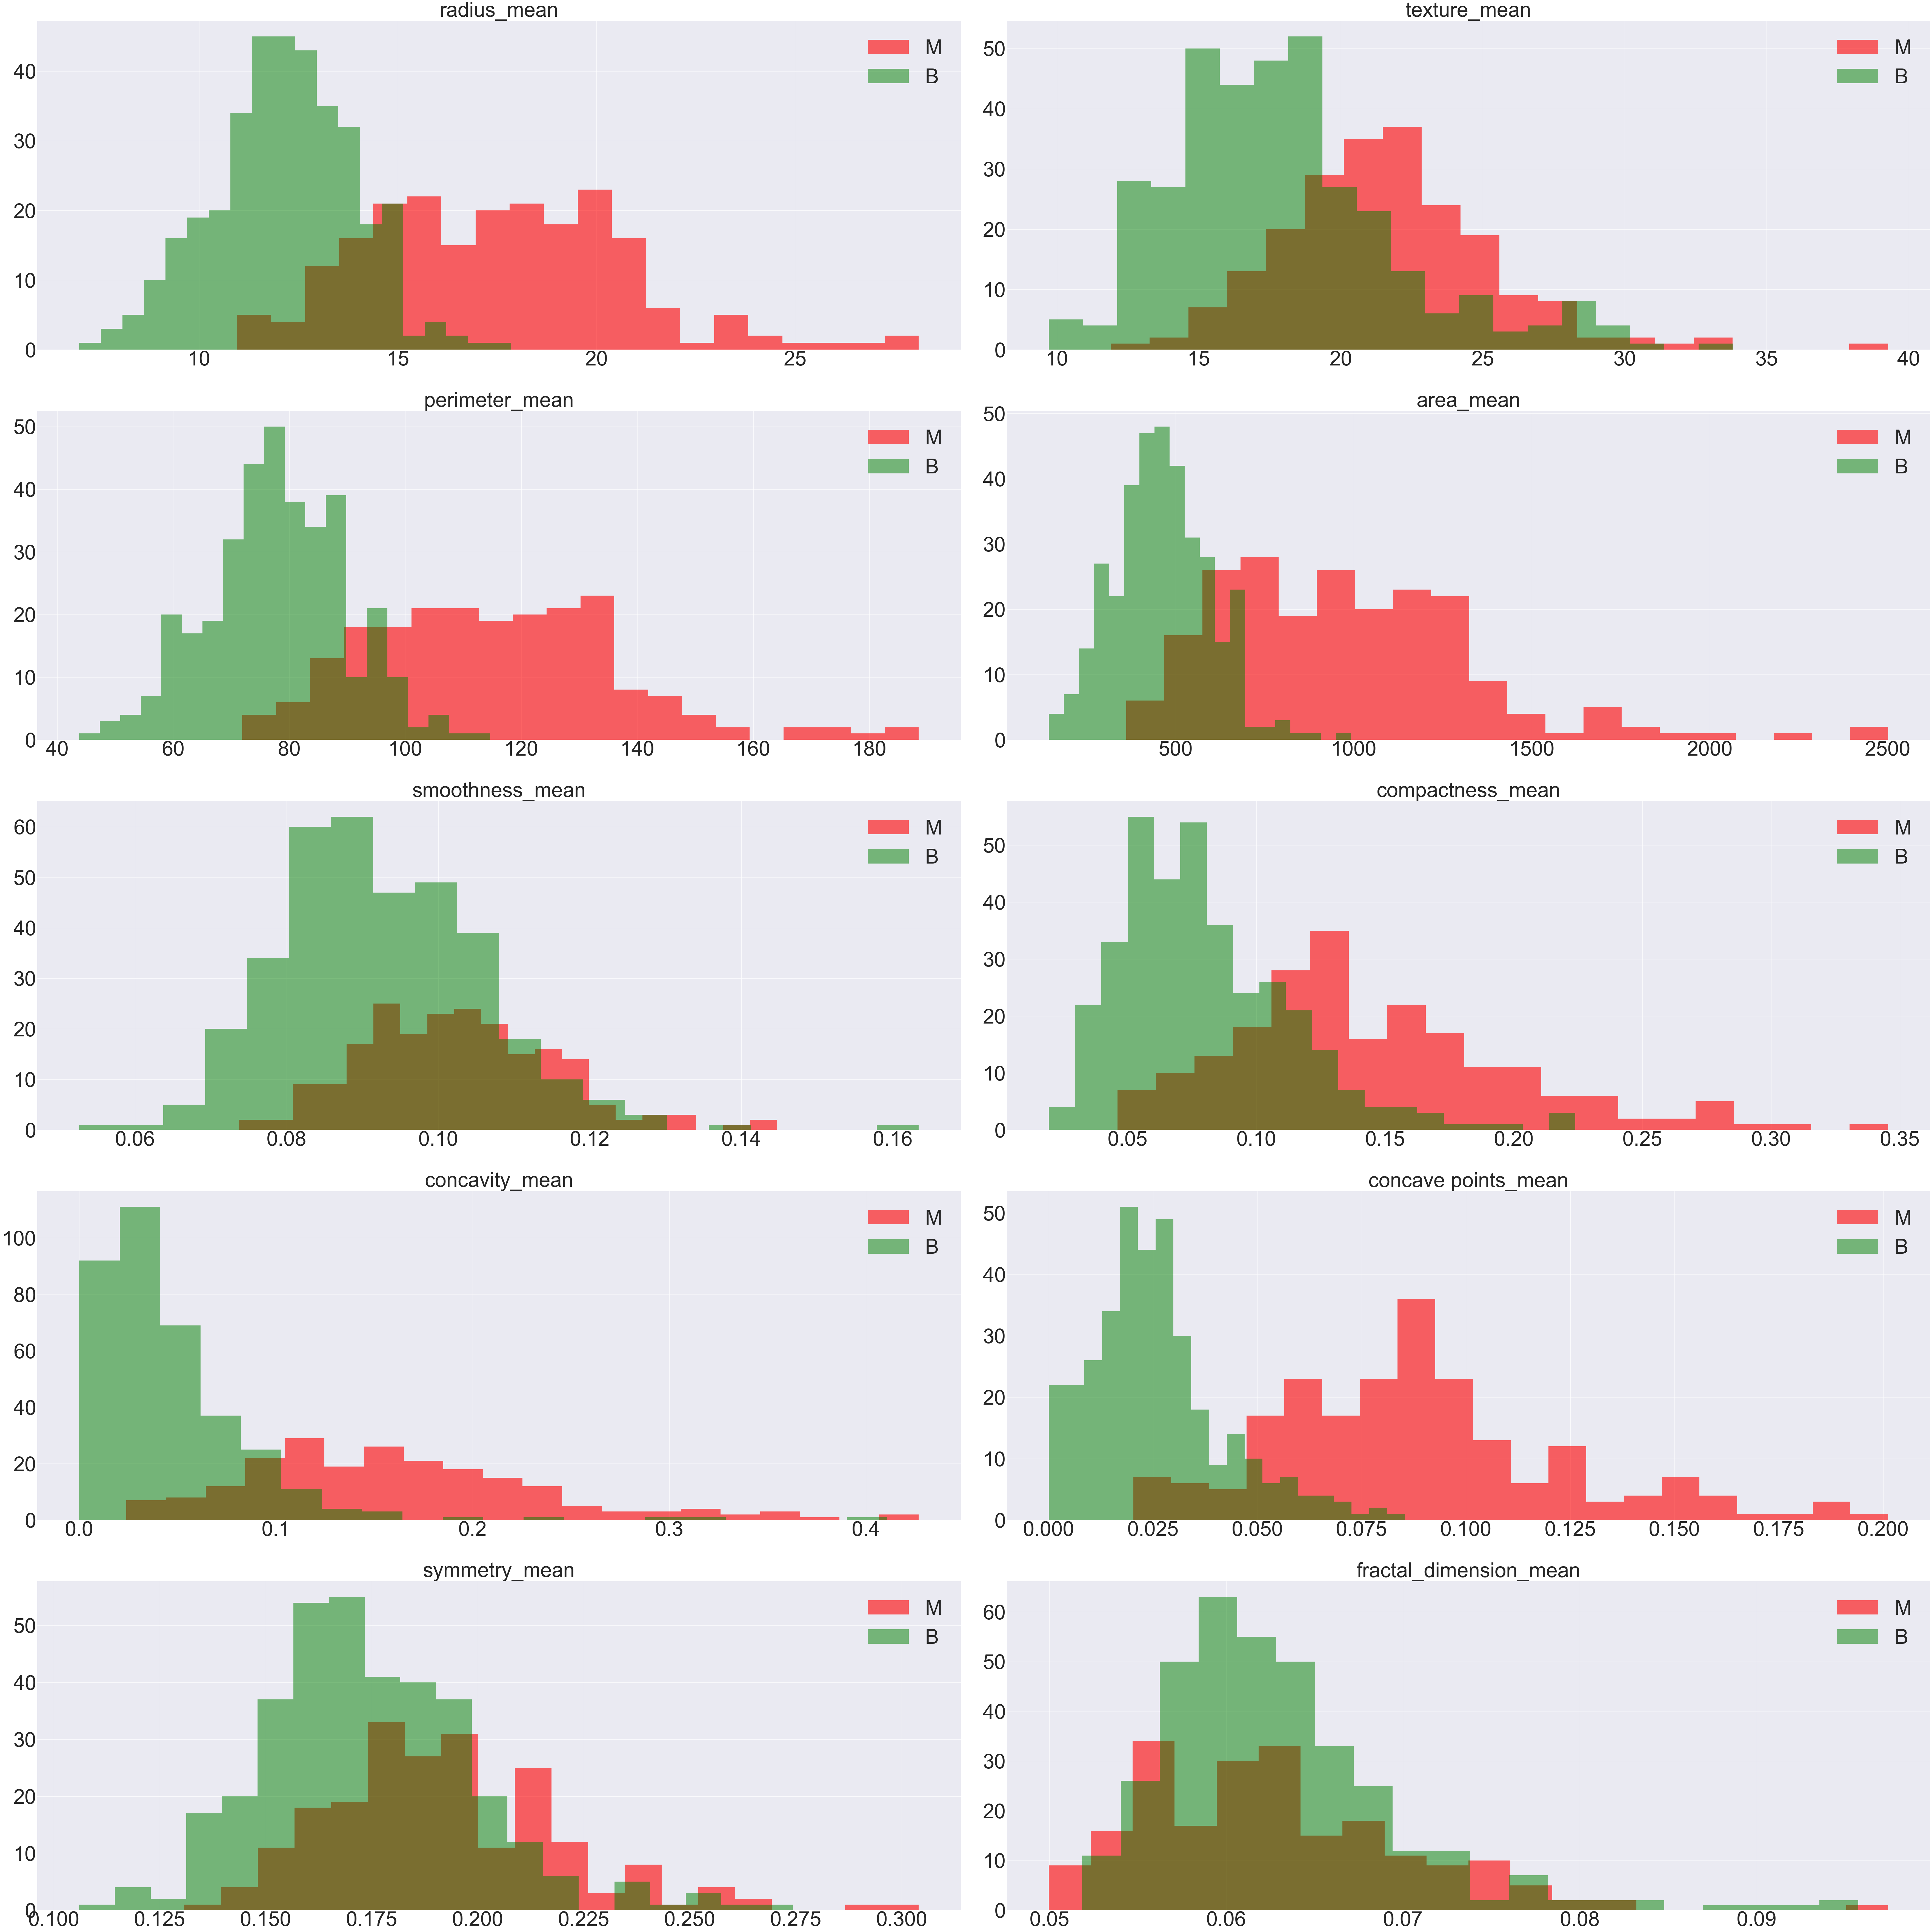

In [19]:
#Defining a variable to hold the columns we want to graph
features_mean=list(breast_cancer.columns[2:12])
#Defining the font size of the graphs
plt.rc('xtick', labelsize=75) 
plt.rc('ytick', labelsize=75)
plt.rcParams.update({'font.size': 75})
#Creating a template for our graphs with 5 rows, 2 columns, and a size
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(100,100))
axes = axes.ravel()
#A for loop going through the axes one by one and filling in the graphs with data
for idx,ax in enumerate(axes):
    #creating a figure container
    ax.figure
    #Plotting the histogra on the first axes, using the column and the index of the column. 
    ax.hist(diagnosis_split[1][features_mean[idx]],
            alpha=0.6,stacked=True, 
            label=['M'],color=['r'],
           bins=20)
    #Doing the same thing for the other type of cancer.
    ax.hist(diagnosis_split[0][features_mean[idx]], 
            alpha=0.5,stacked=True, 
            label=['B'],color=['g'],
           bins=20)
    #Setting legend location
    ax.legend(loc='upper right')
    #Setting each graph title based on the column and its index
    ax.set_title(features_mean[idx], fontdict={'fontsize': 75, 'fontweight': 'medium'})
#Making the Layout tight
plt.tight_layout()
plt.show()

### Using piechart to compare the percentage of Benign cancer vs Malignant cancer

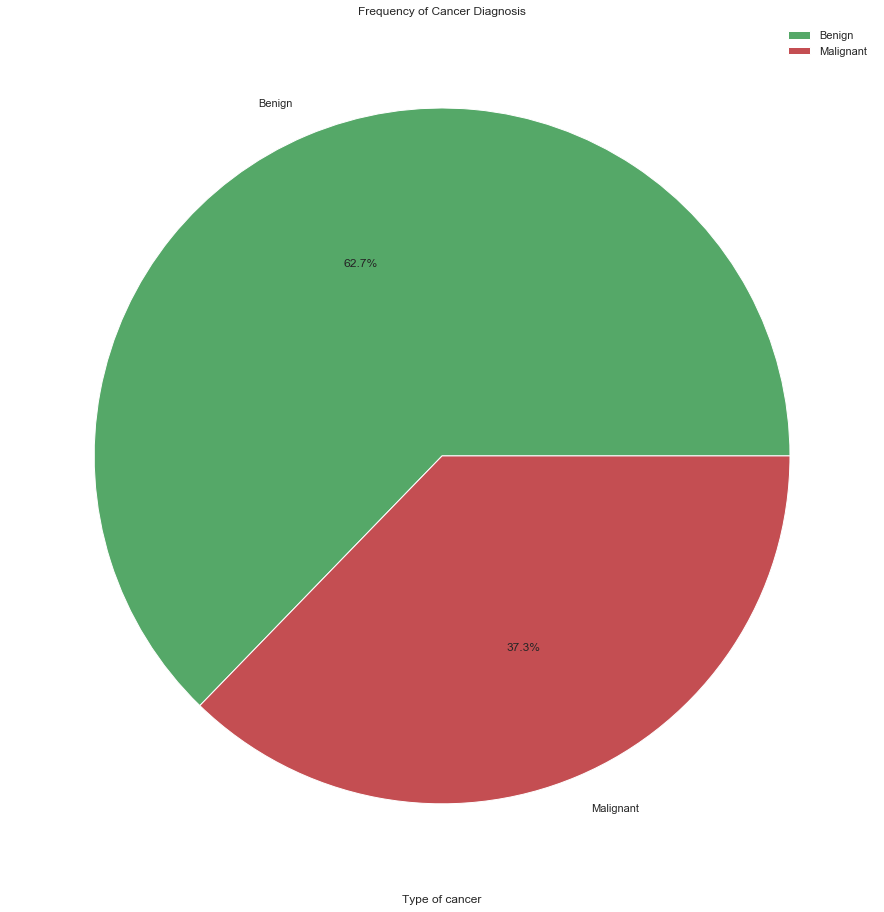

In [23]:
#Using the template above to create a pi chart containing frequency of cancer diagnosis
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
plt.rcParams.update({'font.size': 16})
sns.set(style="darkgrid")
plt.pie([diagnosis_split[0].shape[0], diagnosis_split[1].shape[0]], 
        labels=("Benign", "Malignant"), 
        autopct='%1.1f%%',
        colors =("g", "r")
       )
plt.rc('xtick', labelsize=2) 
plt.rc('ytick', labelsize=2)
plt.legend(loc='upper right')
plt.xlabel("Type of cancer")
plt.title("Frequency of Cancer Diagnosis")
plt.show()

### Creating a histogram comparing the number of Benign and Malignant data in our graph

Text(-0.05, 360, '357')

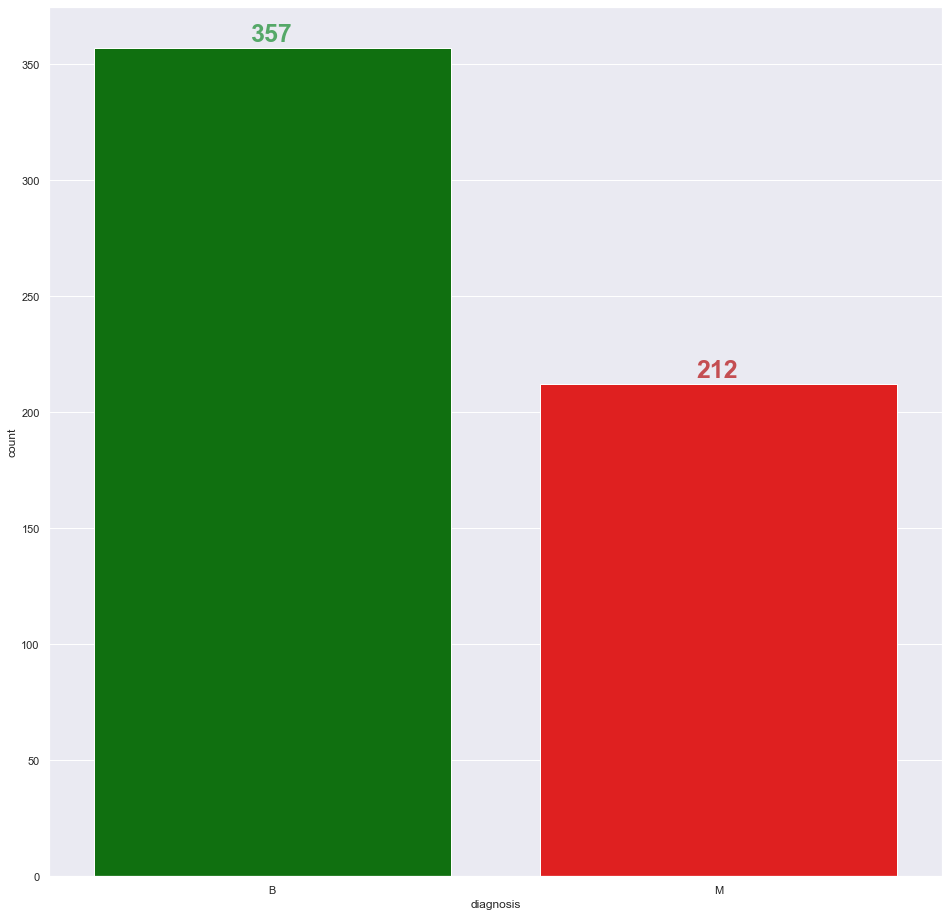

In [21]:
#Graphing the same data above using a bar graph
plt.figure(figsize = (16,16))
sns.set(style="darkgrid")
sns.countplot(x="diagnosis", data = breast_cancer, palette = ["green", "red"] )
plt.text(s="212", x=0.95, y=215, color="r", fontweight="bold", fontsize= 25)
plt.text(s="357", x=-0.05, y=360, color="g", fontweight="bold", fontsize= 25)

### Creating a scatterplot showing the difference in area between benign and malignant

Text(0.5, 1.0, 'Malignant vs Benign Area Mean Comparison')

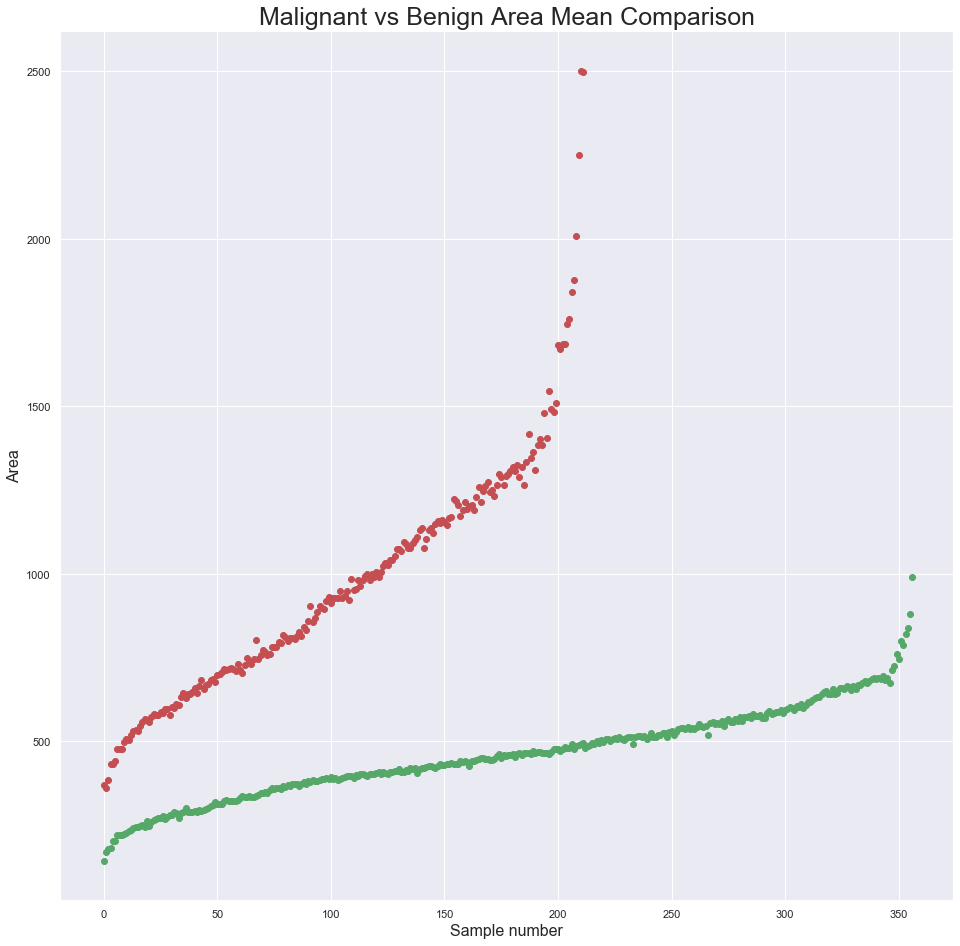

In [22]:
#Making a scatter plot
plt.figure(figsize = (16,16))
plt.scatter(x = diagnosis_split[0].index, y = diagnosis_split[0]["area_mean"], color="g")
plt.scatter(x = diagnosis_split[1].index, y = diagnosis_split[1]["area_mean"], color="r")
plt.xlabel("Sample number", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.ylabel("Area", fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.title("Malignant vs Benign Area Mean Comparison", fontdict={'fontsize': 25, 'fontweight': 'medium'})